# ARTIFICIAL NEURAL NETWORKS (ANN)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Recordar pycaret para futuras implementaciones.

## 1. UNSW Dataset Implementation

Como vimos, este dataset no comparte muchas similitudes con el de IFW, por lo que vamos a generar dos modelos diferentes para ver cual se ajusta mejor. Además, la red neuronal que usemos en este debe de poder clasificar si la acción sería 0 o 1.

In [ ]:
unsw_df = pd.read_csv('/content/drive/MyDrive/PDG2/Datasets/UNSW.csv')

### 1.1 Revisión del dataset

Vamos a empezar revisando los primeros y últimos datos del dataset

In [ ]:
unsw_df.head()

,id,state,rate,sttl,sload,dload,sinpkt,swin,stcpb,dtcpb,...,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,4,74.087490,252,14158.942380,8495.365234,24.295600,255,621772692,2202533631,...,0,1,1,1,1,1,1,0,6,0
1,2,4,78.473372,62,8395.112305,503571.312500,49.915000,255,1417884146,3077387971,...,1,1,1,1,2,1,6,0,6,0
2,3,4,14.170161,62,1572.271851,60929.230470,231.875571,255,2116150707,2963114973,...,1,2,1,1,3,2,6,0,6,0
3,4,4,13.677108,62,2740.178955,3358.622070,152.876547,255,1107119177,1047442890,...,1,2,1,1,3,2,1,0,6,0
4,5,4,33.373826,254,8561.499023,3987.059814,47.750333,255,2436137549,1977154190,...,1,2,2,1,40,2,39,0,6,0


In [ ]:
unsw_df.tail()

,id,state,rate,sttl,sload,dload,sinpkt,swin,stcpb,dtcpb,...,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
257668,82328,5,200000.005100,254,8.320000e+07,0.000000,0.005000,0,0,0,...,2,2,1,1,2,2,1,0,6,0
257669,82329,4,24.410067,254,1.241044e+05,2242.109863,55.880051,255,1072535109,3284291478,...,1,2,1,1,1,3,2,0,6,0
257670,82330,5,0.000000,0,0.000000e+00,0.000000,60000.720000,0,0,0,...,2,1,1,1,1,1,1,1,6,0
257671,82331,5,0.000000,0,0.000000e+00,0.000000,60000.732000,0,0,0,...,2,1,1,1,1,1,1,1,6,0
257672,82332,5,111111.107200,254,4.622222e+07,0.000000,0.009000,0,0,0,...,2,1,1,1,1,1,1,0,6,0


Mostramos nuevamente las columnas y sus tipos de datos.

In [ ]:
unsw_df.dtypes

id                    int64
state                 int64
rate                float64
sttl                  int64
sload               float64
dload               float64
sinpkt              float64
swin                  int64
stcpb                 int64
dtcpb                 int64
dwin                  int64
dmean                 int64
ct_srv_src            int64
ct_state_ttl          int64
ct_dst_ltm            int64
ct_src_dport_ltm      int64
ct_dst_sport_ltm      int64
ct_dst_src_ltm        int64
ct_src_ltm            int64
ct_srv_dst            int64
is_sm_ips_ports       int64
attack_cat            int64
label                 int64
dtype: object

Además, mostramos las clases del target

In [ ]:
unsw_df['label'].value_counts()

1    164673
0     93000
Name: label, dtype: int64

Tenemos que tener en cuenta que en este caso los valores de 0 son las conexiones a las que se les hizo allow y los valores de 1 son las conexiones de deny/drop

Revisamos si el dataset tiene nulos

In [ ]:
unsw_df.isna().sum()

id                  0
state               0
rate                0
sttl                0
sload               0
dload               0
sinpkt              0
swin                0
stcpb               0
dtcpb               0
dwin                0
dmean               0
ct_srv_src          0
ct_state_ttl        0
ct_dst_ltm          0
ct_src_dport_ltm    0
ct_dst_sport_ltm    0
ct_dst_src_ltm      0
ct_src_ltm          0
ct_srv_dst          0
is_sm_ips_ports     0
attack_cat          0
label               0
dtype: int64

Posteriormente, queremos ver el shape y la cantidad de datos del dataset para estar seguros de como entrenar la red neuronal

In [ ]:
unsw_df.shape

(257673, 23)

In [ ]:
unsw_df.__len__()

257673

También hay que revisar si está balanceado el dataset en su variable target

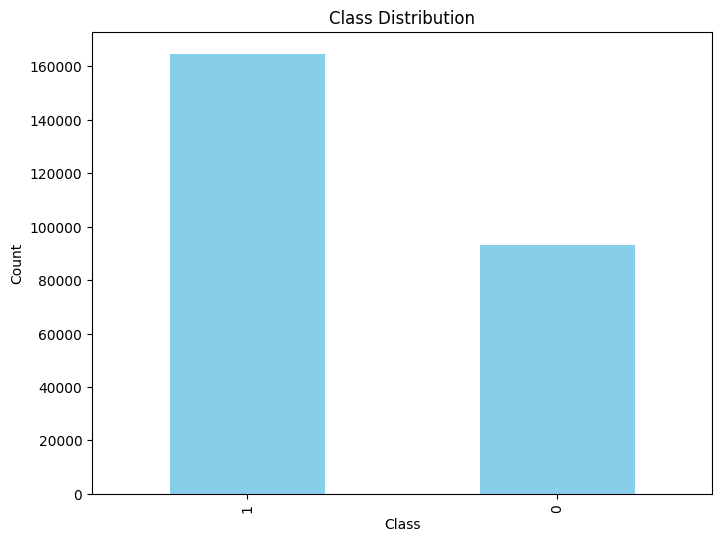

In [ ]:
# Get the target
target = unsw_df['label']

# Count the occurrences of each class
class_distribution = target.value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
target.value_counts()

1    164673
0     93000
Name: label, dtype: int64

Ahora vamos a ver los atributos más relacionados con el label.

In [ ]:
unsw_df.corrwith(unsw_df['label']).abs().nlargest(24)

label               1.000000
sttl                0.624082
attack_cat          0.602160
id                  0.490584
ct_state_ttl        0.476559
state               0.462972
ct_dst_sport_ltm    0.371672
swin                0.364877
dload               0.352169
dwin                0.339166
rate                0.335883
ct_src_dport_ltm    0.318518
ct_dst_src_ltm      0.299609
dmean               0.295173
stcpb               0.266585
dtcpb               0.263543
ct_src_ltm          0.252498
ct_srv_dst          0.247812
ct_srv_src          0.246596
ct_dst_ltm          0.240776
sload               0.165249
is_sm_ips_ports     0.160126
sinpkt              0.155454
dtype: float64

Quitamos los atributos ID y Attack_cat. Id al ser un identificador, no simboliza nada y attack_Cat es la categoría del ataque, por lo que hace parte de la predicción.

In [ ]:
unsw_df = unsw_df.drop(['id', 'attack_cat'], axis=1)

In [ ]:
unsw_df.corrwith(unsw_df['label']).abs().nlargest(20)

label               1.000000
sttl                0.624082
ct_state_ttl        0.476559
state               0.462972
ct_dst_sport_ltm    0.371672
swin                0.364877
dload               0.352169
dwin                0.339166
rate                0.335883
ct_src_dport_ltm    0.318518
ct_dst_src_ltm      0.299609
dmean               0.295173
stcpb               0.266585
dtcpb               0.263543
ct_src_ltm          0.252498
ct_srv_dst          0.247812
ct_srv_src          0.246596
ct_dst_ltm          0.240776
sload               0.165249
is_sm_ips_ports     0.160126
dtype: float64

### 1.2 Implementación Red Neuronal

In [ ]:
dataset = unsw_df.copy()

Separar el X y el y (Variables dependientes e independientes)

In [ ]:
X = dataset.drop('label', axis=1)
y = dataset['label']

Hacer el split de train y los remaining para hacer test y val

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.4, random_state = 0)


Ahora hacemos el split de test y val

In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

Usaremos standard scaler para normalizar los datos

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

Ahora inicializamos la red neuronal artificial

In [ ]:
classifier = Sequential()

Y añadimos las capas...

In [ ]:
X_train.shape

(154603, 20)

In [ ]:
init_neurons = X_train.shape[1]
print(init_neurons)

20


In [ ]:
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=init_neurons))

In [ ]:
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [ ]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))


Ahora compilamos

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Now we fit the classifier

In [ ]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
15461/15461 [==============================] - 28s 2ms/step - loss: 0.2348 - accuracy: 0.8953
Epoch 2/100
15461/15461 [==============================] - 28s 2ms/step - loss: 0.2071 - accuracy: 0.9048
Epoch 3/100
15461/15461 [==============================] - 28s 2ms/step - loss: 0.2025 - accuracy: 0.9076
Epoch 4/100
15461/15461 [==============================] - 28s 2ms/step - loss: 0.1995 - accuracy: 0.9094
Epoch 5/100
15461/15461 [==============================] - 27s 2ms/step - loss: 0.1965 - accuracy: 0.9112
Epoch 6/100
15461/15461 [==============================] - 27s 2ms/step - loss: 0.1939 - accuracy: 0.9124
Epoch 7/100
15461/15461 [==============================] - 27s 2ms/step - loss: 0.1927 - accuracy: 0.9121
Epoch 8/100
15461/15461 [==============================] - 27s 2ms/step - loss: 0.1918 - accuracy: 0.9124
Epoch 9/100
15461/15461 [==============================] - 27s 2ms/step - loss: 0.1911 - accuracy: 0.9124
Epoch 10/100
15461/15461 [====================

And predictions:

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1611/1611 [==============================] - 2s 1ms/step


Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[16270  2269]
 [ 1962 31034]]


0.9179004560007762

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

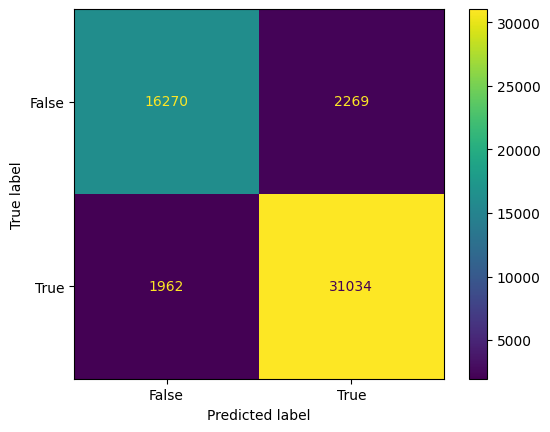

In [ ]:

cm_display.plot()
plt.show()

## 2. IFWData Implementation

En el caso de IFW tenemos clases de 0 a 3. 0: allow, 1: deny, 2: drop, 3: reset-both. Por lo que tendremos que usar funciones de activación que permitan multiples clasificaciones.

### 2.1 Limpieza del dataset

In [ ]:
ifw_df = pd.read_csv('/content/drive/MyDrive/PDG2/Datasets/Internet_firewall_data.csv')

Vamos a ver los primeros y últimos datos

In [ ]:
ifw_df.head()

,Source Port,Destination Port,Action,Bytes,Bytes Sent,Elapsed Time (sec),pkts_sent
0,57222,53,0,177,94,30,1
1,56258,3389,0,4768,1600,17,10
2,6881,50321,0,238,118,1199,1
3,50553,3389,0,3327,1438,17,8
4,50002,443,0,25358,6778,16,13


In [ ]:
ifw_df.tail()

,Source Port,Destination Port,Action,Bytes,Bytes Sent,Elapsed Time (sec),pkts_sent
65527,63691,80,0,314,192,15,4
65528,50964,80,0,4680740,67312,77,985
65529,54871,445,2,70,70,0,1
65530,54870,445,2,70,70,0,1
65531,54867,445,2,70,70,0,1


Vamos a ver los nulos

In [ ]:
ifw_df.isna().sum()

Source Port           0
Destination Port      0
Action                0
Bytes                 0
Bytes Sent            0
Elapsed Time (sec)    0
pkts_sent             0
dtype: int64

Vamos a ver las columnas, tipos de datos y clases del target

In [ ]:
ifw_df.dtypes

Source Port           int64
Destination Port      int64
Action                int64
Bytes                 int64
Bytes Sent            int64
Elapsed Time (sec)    int64
pkts_sent             int64
dtype: object

In [ ]:
ifw_df['Action'].value_counts()

0    37640
1    14987
2    12851
3       54
Name: Action, dtype: int64

También queremos ver el shape y el balanceo de los datos del target

In [ ]:
ifw_df.shape

(65532, 7)

In [ ]:
ifw_df.__len__()

65532

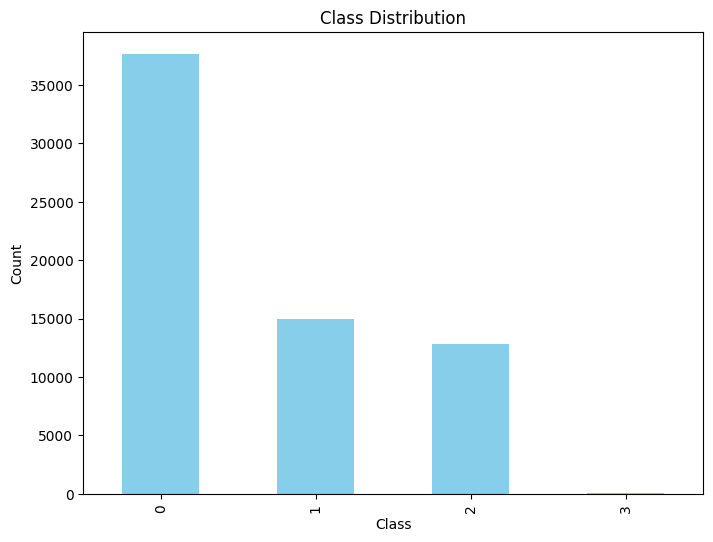

In [ ]:
# Get the target
target = ifw_df['Action']

# Count the occurrences of each class
class_distribution = target.value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Ahora, revisaremos la correlación de las variables independientes con el target

In [ ]:
ifw_df.corrwith(ifw_df['Action']).abs().nlargest(8)

Action                1.000000
Elapsed Time (sec)    0.170684
Destination Port      0.095110
Source Port           0.038343
Bytes                 0.013546
pkts_sent             0.009842
Bytes Sent            0.004570
dtype: float64

### 2.2 Implementación de la red neuronal

In [ ]:
ifw_dataset = ifw_df.copy()

Separamos X y Y

In [ ]:
X = ifw_dataset.drop('Action', axis=1)
y = ifw_dataset['Action']

Haremos dos split, uno para train y rem y otro para test y val

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size = 0.4, random_state = 0)


In [ ]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5, random_state = 0)

Ahora, usaremos el StandardScaler para normalizar los datos

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

E inicializaremos la red neuronal

In [ ]:
classifier_fw = Sequential()

Obtendremos los datos del shape para las capas

In [ ]:
X_train.shape

(39319, 6)

In [ ]:
init_neurons = X_train.shape[1]
print(init_neurons)

6


Y pondremos las capas de la red

In [ ]:
classifier_fw.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=init_neurons))

In [ ]:
classifier_fw.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))


In [ ]:
classifier_fw.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'softmax'))


Ahora compilamos

In [ ]:
classifier_fw.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Finalmente, hacemos fit a la red

In [ ]:
classifier_fw.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100
3932/3932 [==============================] - 12s 2ms/step - loss: -3.2724 - accuracy: 0.2299
Epoch 2/100
3932/3932 [==============================] - 7s 2ms/step - loss: -35.8247 - accuracy: 0.2299
Epoch 3/100
3932/3932 [==============================] - 6s 2ms/step - loss: -118.8285 - accuracy: 0.2299
Epoch 4/100
3932/3932 [==============================] - 7s 2ms/step - loss: -268.8034 - accuracy: 0.2299
Epoch 5/100
3932/3932 [==============================] - 6s 2ms/step - loss: -501.6718 - accuracy: 0.2299
Epoch 6/100
3932/3932 [==============================] - 7s 2ms/step - loss: -831.8344 - accuracy: 0.2299
Epoch 7/100
3932/3932 [==============================] - 6s 2ms/step - loss: -1282.1385 - accuracy: 0.2299
Epoch 8/100
3932/3932 [==============================] - 7s 2ms/step - loss: -1865.6902 - accuracy: 0.2299
Epoch 9/100
3932/3932 [==============================] - 6s 2ms/step - loss: -2598.0874 - accuracy: 0.2299
Epoch 10/100
3932/3932 [=====================

Y hacemos las predicciones... Así como obtener la matrices de confusión

In [ ]:
y_pred = classifier_fw.predict(X_test)
y_pred = (y_pred > 0.5)

410/410 [==============================] - 2s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[   0 7565    0    0]
 [   0 2938    0    0]
 [   0 2594    0    0]
 [   0   10    0    0]]


0.22415503166247044

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

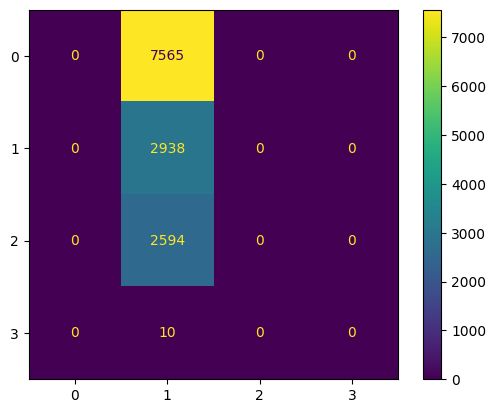

In [ ]:
cm_display.plot()
plt.show()

# 3. Pycaret

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import *

# Carga de datos
data = pd.read_csv('/content/drive/MyDrive/PDG2/Datasets/Internet_firewall_data.csv')

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
# Configuración de PyCaret
setup(train_data, target='Action')

,Description,Value
0,Session id,8727
1,Target,Action
2,Target type,Multiclass
3,Original data shape,"(52425, 7)"
4,Transformed data shape,"(52425, 7)"
5,Transformed train set shape,"(36697, 7)"
6,Transformed test set shape,"(15728, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# Comparación de modelos
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9985,0.9997,0.9985,0.9984,0.9984,0.9974,0.9974,8.2660
xgboost,Extreme Gradient Boosting,0.9984,0.9998,0.9984,0.9980,0.9982,0.9972,0.9972,1.2080
rf,Random Forest Classifier,0.9983,0.9996,0.9983,0.9979,0.9980,0.9970,0.9970,2.0120
et,Extra Trees Classifier,0.9979,0.9995,0.9979,0.9973,0.9976,0.9964,0.9964,1.4570
dt,Decision Tree Classifier,0.9978,0.9987,0.9978,0.9978,0.9978,0.9962,0.9962,0.0840
gbc,Gradient Boosting Classifier,0.9960,0.9977,0.9960,0.9960,0.9959,0.9931,0.9932,13.1650
lr,Logistic Regression,0.9893,0.9980,0.9893,0.9887,0.9888,0.9815,0.9816,7.1900
ada,Ada Boost Classifier,0.9880,0.9942,0.9880,0.9951,0.9912,0.9806,0.9817,1.1100
knn,K Neighbors Classifier,0.9589,0.9886,0.9589,0.9581,0.9585,0.9293,0.9293,0.4580
svm,SVM - Linear Kernel,0.8856,0.0000,0.8856,0.8814,0.8765,0.7995,0.8098,1.4250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Ajuste del modelo seleccionado
final_model = create_model(best_model)

# Evaluación del modelo
evaluate_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9989,0.9998,0.9989,0.9988,0.9988,0.9981,0.9981
1,0.9984,1.0000,0.9984,0.9984,0.9982,0.9972,0.9972
2,0.9997,0.9998,0.9997,0.9997,0.9997,0.9995,0.9995
3,0.9973,0.9995,0.9973,0.9970,0.9971,0.9953,0.9953
4,0.9992,0.9999,0.9992,0.9992,0.9992,0.9986,0.9986
5,0.9986,0.9997,0.9986,0.9986,0.9986,0.9977,0.9977
6,0.9981,0.9993,0.9981,0.9979,0.9980,0.9967,0.9967
7,0.9981,0.9999,0.9981,0.9981,0.9980,0.9967,0.9967
8,0.9981,0.9994,0.9981,0.9982,0.9981,0.9967,0.9967


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions = predict_model(final_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9991,0.9997,0.9991,0.9991,0.9991,0.9984,0.9984


In [ ]:
from pycaret.classification import plot_model


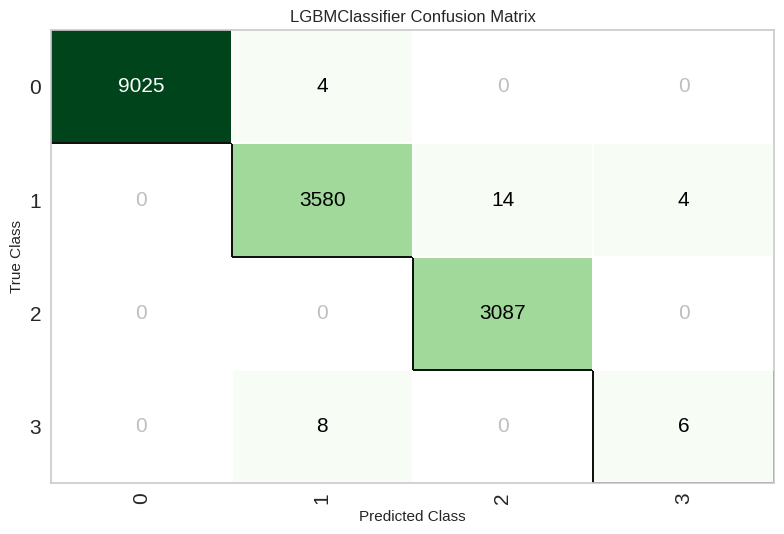

In [ ]:
# Visualizar la matriz de confusión
plot_model(final_model, plot='confusion_matrix')


In [ ]:
setup(data, target='Action')

,Description,Value
0,Session id,1276
1,Target,Action
2,Target type,Multiclass
3,Original data shape,"(65532, 7)"
4,Transformed data shape,"(65532, 7)"
5,Transformed train set shape,"(45872, 7)"
6,Transformed test set shape,"(19660, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9986,0.9998,0.9986,0.9984,0.9984,0.9975,0.9975,1.4280
lightgbm,Light Gradient Boosting Machine,0.9985,0.9998,0.9985,0.9983,0.9983,0.9973,0.9973,8.7350
rf,Random Forest Classifier,0.9981,0.9996,0.9981,0.9980,0.9980,0.9968,0.9968,2.6940
gbc,Gradient Boosting Classifier,0.9980,0.9991,0.9980,0.9979,0.9979,0.9965,0.9965,17.5070
dt,Decision Tree Classifier,0.9979,0.9987,0.9979,0.9978,0.9979,0.9964,0.9964,0.1080
et,Extra Trees Classifier,0.9978,0.9996,0.9978,0.9977,0.9976,0.9962,0.9962,1.7890
lr,Logistic Regression,0.9898,0.9980,0.9898,0.9892,0.9894,0.9823,0.9825,7.9830
ada,Ada Boost Classifier,0.9746,0.9909,0.9746,0.9865,0.9797,0.9584,0.9603,1.3350
knn,K Neighbors Classifier,0.9630,0.9902,0.9630,0.9623,0.9626,0.9363,0.9363,0.3740
svm,SVM - Linear Kernel,0.8797,0.0000,0.8797,0.9036,0.8786,0.8000,0.8109,2.3500


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# Ajuste del modelo seleccionado
final_model = create_model(best_model)

# Evaluación del modelo
evaluate_model(final_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9978,0.9999,0.9978,0.9974,0.9976,0.9962,0.9962
1,0.9989,0.9999,0.9989,0.9989,0.9987,0.9981,0.9981
2,0.9980,0.9995,0.9980,0.9979,0.9980,0.9966,0.9966
3,0.9985,0.9999,0.9985,0.9985,0.9984,0.9974,0.9974
4,0.9985,0.9999,0.9985,0.9985,0.9985,0.9974,0.9974
5,0.9989,0.9998,0.9989,0.9989,0.9987,0.9981,0.9981
6,0.9987,1.0000,0.9987,0.9978,0.9983,0.9977,0.9977
7,0.9987,0.9997,0.9987,0.9987,0.9985,0.9977,0.9977
8,0.9983,0.9998,0.9983,0.9983,0.9982,0.9970,0.9970


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
predictions = predict_model(final_model, data=test_data)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9992,1.0000,0.9992,0.9992,0.9992,0.9987,0.9987


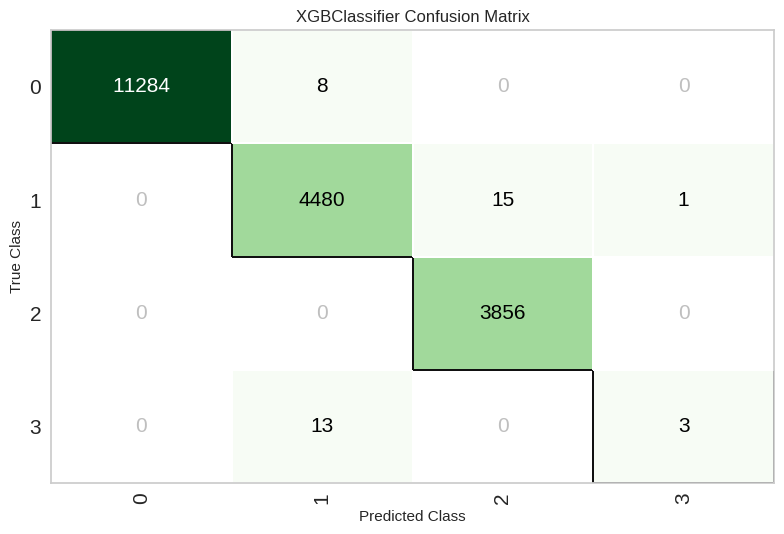

In [ ]:
# Visualizar la matriz de confusión
plot_model(final_model, plot='confusion_matrix')